# tampa modeling residuals w/grouped features

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

from google.cloud import bigquery
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="groovy-groove-309018-3049c669c548.json"
client = bigquery.Client()

import seaborn as sns

### Predictors

In [12]:
tampa_zip = ['33647', '33612', '33610', '33611', '33604', '33607', '33629',
                 '33602', '33606', '33609', '33603', '33605', '33616']

In [13]:
%load_ext google.cloud.bigquery

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [14]:
%%bigquery acs_tampa1
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2011_5yr`
WHERE geo_id in ('33647', '33612', '33610', '33611', '33604', '33607', '33629',
                 '33602', '33606', '33609', '33603', '33605', '33616')
UNION ALL
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2012_5yr`
WHERE geo_id in ('33647', '33612', '33610', '33611', '33604', '33607', '33629',
                 '33602', '33606', '33609', '33603', '33605', '33616');


Downloading: 100%|██████████| 26/26 [00:02<00:00, 12.99rows/s]


In [15]:
%%bigquery acs_tampa2
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2013_5yr`
WHERE geo_id in ('33647', '33612', '33610', '33611', '33604', '33607', '33629',
                 '33602', '33606', '33609', '33603', '33605', '33616')
UNION ALL
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2014_5yr`
WHERE geo_id in ('33647', '33612', '33610', '33611', '33604', '33607', '33629',
                 '33602', '33606', '33609', '33603', '33605', '33616');

Downloading: 100%|██████████| 26/26 [00:02<00:00, 12.74rows/s]


In [16]:
%%bigquery acs_tampa3
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2015_5yr`
WHERE geo_id in ('33647', '33612', '33610', '33611', '33604', '33607', '33629',
                 '33602', '33606', '33609', '33603', '33605', '33616');


Downloading: 100%|██████████| 13/13 [00:01<00:00,  6.81rows/s]


In [17]:
%%bigquery acs_tampa4
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2016_5yr`
WHERE geo_id in ('33647', '33612', '33610', '33611', '33604', '33607', '33629',
                 '33602', '33606', '33609', '33603', '33605', '33616')
;

Downloading: 100%|██████████| 13/13 [00:01<00:00,  6.60rows/s]


In [18]:
%%bigquery acs_tampa5

SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2017_5yr`
WHERE geo_id in ('33647', '33612', '33610', '33611', '33604', '33607', '33629',
                 '33602', '33606', '33609', '33603', '33605', '33616')
;

Downloading: 100%|██████████| 13/13 [00:01<00:00,  6.68rows/s]


In [19]:
%%bigquery acs_tampa6
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2018_5yr`
WHERE geo_id in ('33647', '33612', '33610', '33611', '33604', '33607', '33629',
                 '33602', '33606', '33609', '33603', '33605', '33616');

Downloading: 100%|██████████| 13/13 [00:02<00:00,  6.02rows/s]


In [20]:
acs_cols1=acs_tampa1.columns
acs_cols2=acs_tampa2.columns
acs_cols3=acs_tampa3.columns
acs_cols4=acs_tampa4.columns
acs_cols5=acs_tampa5.columns
acs_cols6=acs_tampa6.columns

common_columns=list((((((set(acs_cols1).intersection
                        (set(acs_cols2))).intersection
                        (set(acs_cols3))).intersection
                        (set(acs_cols4))).intersection
                        (set(acs_cols5))).intersection
                        (set(acs_cols6))))

In [21]:
dfs=[acs_tampa1[common_columns],
    acs_tampa2[common_columns],
    acs_tampa3[common_columns],
    acs_tampa4[common_columns],
    acs_tampa5[common_columns],
    acs_tampa6[common_columns]]

acs_all_tampa=pd.concat(dfs)
acs_all_tampa.shape

(104, 234)

In [22]:
acs_all_tampa['do_date'] = acs_all_tampa['do_date'].astype(str)
acs_all_tampa['year'] = np.where(acs_all_tampa['do_date'] =='20072011', '2011',
                                  np.where(acs_all_tampa['do_date'] =='20082012','2012',
                                  np.where(acs_all_tampa['do_date'] =='20092013','2013',
                                  np.where(acs_all_tampa['do_date'] =='20102014','2014',
                                  np.where(acs_all_tampa['do_date'] =='20112015','2015',
                                  np.where(acs_all_tampa['do_date'] =='20122016','2016',
                                  np.where(acs_all_tampa['do_date'] =='20132017','2017',
                                  np.where(acs_all_tampa['do_date'] =='2014-01-01','2018',
                                           None))))))))

In [23]:
acs_all_tampa['year'] = acs_all_tampa['year'].astype('string')


In [24]:
acs_all_tampa.head()

,median_rent,vacant_housing_units,one_parent_families_with_young_children,one_year_more_college,female_female_households,families_with_young_children,sales_office_employed,rent_20_to_25_percent,male_45_64_grade_9_12,male_45_64_some_college,male_80_to_84,dwellings_50_or_more_units,less_one_year_college,income_less_10000,owner_occupied_housing_units,owner_occupied_housing_units_median_value,black_male_55_64,occupation_natural_resources_construction_maintenance,male_25_to_29,female_10_to_14,two_or_more_races_pop,income_200000_or_more,occupation_production_transportation_material,male_85_and_over,less_than_high_school_graduate,vacant_housing_units_for_rent,dwellings_3_to_4_units,other_race_pop,female_40_to_44,income_20000_24999,male_10_to_14,income_45000_49999,male_20,income_50000_59999,pop_in_labor_force,in_grades_1_to_4,married_households,income_150000_199999,median_year_structure_built,one_car,million_dollar_housing_units,male_under_5,population_3_years_over,housing_built_1939_or_earlier,commute_60_more_mins,female_60_to_61,father_in_labor_force_one_parent_families_with_young_children,high_school_diploma,two_parents_mother_in_labor_force_families_with_young_children,employed_other_services_not_public_admin,male_65_to_66,pop_16_over,speak_spanish_at_home,male_67_to_69,employed_arts_entertainment_recreation_accommodation_food,employed_education_health_social,male_30_to_34,commute_less_10_mins,population_1_year_and_over,male_35_to_39,female_15_to_17,income_60000_74999,poverty,female_18_to_19,employed_information,female_30_to_34,housing_built_2005_or_later,geo_id,occupation_services,four_more_cars,commute_25_29_mins,two_parents_father_in_labor_force_families_with_young_children,male_50_to_54,female_80_to_84,amerindian_pop,female_85_and_over,workers_16_and_over,commute_10_14_mins,rent_35_to_40_percent,high_school_including_ged,in_school,median_age,rent_25_to_30_percent,some_college_and_associates_degree,pop_25_64,income_10000_14999,nonfamily_households,commuters_by_subway_or_elevated,male_45_64_bachelors_degree,owner_occupied_housing_units_lower_value_quartile,mobile_homes,different_house_year_ago_different_city,white_pop,not_hispanic_pop,income_40000_44999,dwellings_10_to_19_units,dwellings_2_units,in_grades_9_to_12,children,civilian_labor_force,hispanic_male_55_64,owner_occupied_housing_units_upper_value_quartile,mortgaged_housing_units,asian_male_55_64,not_us_citizen_pop,associates_degree,renter_occupied_housing_units_paying_cash_median_gross_rent,female_62_to_64,male_15_to_17,male_40_to_44,pop_5_years_over,female_67_to_69,employed_agriculture_forestry_fishing_hunting_mining,female_under_5,income_15000_19999,vacant_housing_units_for_sale,family_households,households_public_asst_or_food_stamps,children_in_single_female_hh,percent_income_spent_on_rent,rent_burden_not_computed,worked_at_home,black_male_45_54,management_business_sci_arts_employed,asian_male_45_54,male_5_to_9,hispanic_pop,male_21,female_70_to_74,median_income,commuters_drove_alone,male_55_to_59,speak_only_english_at_home,rent_under_10_percent,commuters_16_over,pop_determined_poverty_status,rent_10_to_15_percent,commuters_by_car_truck_van,female_35_to_39,female_25_to_29,bachelors_degree,in_undergrad_college,rent_40_to_50_percent,commuters_by_public_transportation,two_parents_in_labor_force_families_with_young_children,commute_35_44_mins,female_22_to_24,rent_over_50_percent,female_pop,employed_construction,female_75_to_79,masters_degree,different_house_year_ago_same_city,male_male_households,two_parent_families_with_young_children,no_car,commuters_by_bus,male_45_64_associates_degree,asian_pop,income_per_capita,in_grades_5_to_8,graduate_professional_degree,female_50_to_54,two_cars,male_45_64_graduate_degree,female_21,father_one_parent_families_with_young_children,male_pop,no_cars,income_35000_39999,walked_to_work,commuters_by_carpool,not_in_labor_force,income_125000_149999,occupied_housing_units,male_45_64_high_school,pop_25_years_over,employed_finance_insurance_real_est

In [25]:
missing_zip = [el for el in tampa_zip if el not in list(acs_all_tampa['geo_id'])]
missing_zip

[]

#### Grouping female age columns together

In [26]:
female_under_18 = acs_all_tampa.female_under_5 + acs_all_tampa.female_5_to_9 + acs_all_tampa.female_10_to_14 + acs_all_tampa.female_15_to_17 + acs_all_tampa.female_18_to_19
female_under_60 = acs_all_tampa.female_20 + acs_all_tampa.female_21 + acs_all_tampa.female_22_to_24 + acs_all_tampa.female_25_to_29 + acs_all_tampa.female_30_to_34 + acs_all_tampa.female_35_to_39 + acs_all_tampa.female_40_to_44 + acs_all_tampa.female_45_to_49 + acs_all_tampa.female_50_to_54 + acs_all_tampa.female_55_to_59 
female_over_60 = acs_all_tampa.female_60_to_61 + acs_all_tampa.female_62_to_64 + acs_all_tampa.female_65_to_66 + acs_all_tampa.female_67_to_69 + acs_all_tampa.female_70_to_74 + acs_all_tampa.female_75_to_79 + acs_all_tampa.female_80_to_84 + acs_all_tampa.female_85_and_over

In [27]:
female_under_18 = female_under_18.astype(float)
female_under_60 = female_under_60.astype(float)
female_over_60 = female_over_60.astype(float)

#### Grouping male age columns together

In [28]:
male_under_18 = acs_all_tampa.male_under_5 + acs_all_tampa.male_5_to_9 + acs_all_tampa.male_10_to_14 + acs_all_tampa.male_15_to_17 + acs_all_tampa.male_18_to_19
male_under_60 = acs_all_tampa.male_20 + acs_all_tampa.male_21 + acs_all_tampa.male_22_to_24 + acs_all_tampa.male_25_to_29 + acs_all_tampa.male_30_to_34 + acs_all_tampa.male_35_to_39 + acs_all_tampa.male_40_to_44 + acs_all_tampa.male_45_to_49 + acs_all_tampa.male_50_to_54 + acs_all_tampa.male_55_to_59 
male_over_60 =  acs_all_tampa.male_65_to_66 + acs_all_tampa.male_67_to_69 + acs_all_tampa.male_70_to_74 + acs_all_tampa.male_75_to_79 + acs_all_tampa.male_80_to_84 + acs_all_tampa.male_85_and_over

In [29]:
male_under_18 = male_under_18.astype(float)
male_under_60 = male_under_60.astype(float)
male_over_60 = male_over_60.astype(float)

#### Grouping rent affordability columns together

In [30]:
under10 = acs_all_tampa.rent_under_10_percent
tento50 = acs_all_tampa.rent_40_to_50_percent + acs_all_tampa.rent_35_to_40_percent + acs_all_tampa.rent_30_to_35_percent+ acs_all_tampa.rent_25_to_30_percent + acs_all_tampa.rent_20_to_25_percent + acs_all_tampa.rent_15_to_20_percent + acs_all_tampa.rent_10_to_15_percent
over50 = acs_all_tampa.rent_over_50_percent
uncomputed = acs_all_tampa.rent_burden_not_computed

In [31]:
rent_under10 = under10.astype(float)
rent_tento50 = tento50.astype(float)
rent_over50 = over50.astype(float)
rent_uncomputed = uncomputed.astype(float)

#### Grouping dwellings columns together

In [32]:
small_dwellings = acs_all_tampa.dwellings_1_units_attached + acs_all_tampa.dwellings_1_units_detached + acs_all_tampa.dwellings_2_units + acs_all_tampa.dwellings_3_to_4_units + acs_all_tampa.dwellings_5_to_9_units
large_dwellings = acs_all_tampa.dwellings_10_to_19_units + acs_all_tampa.dwellings_20_to_49_units + acs_all_tampa.dwellings_50_or_more_units

In [33]:
small_dwellings = small_dwellings.astype(float)
large_dwellings = large_dwellings.astype(float)

#### Grouping commute time together

In [34]:
commute_less_than_30 =  acs_all_tampa.commute_less_10_mins + acs_all_tampa.commute_10_14_mins + acs_all_tampa.commute_15_19_mins + acs_all_tampa.commute_20_24_mins + acs_all_tampa.commute_25_29_mins
commute_less_than_60 = acs_all_tampa.commute_30_34_mins + acs_all_tampa.commute_35_44_mins +  acs_all_tampa.commute_45_59_mins
commute_over_60 =  acs_all_tampa.commute_60_more_mins 

In [35]:
commute_less_than_30 = commute_less_than_30.astype(float)
commute_less_than_60 = commute_less_than_60.astype(float)
commute_over_60 = commute_over_60.astype(float)

#### Grouping income levels together

In [36]:
income_less_than_60000 = acs_all_tampa.income_less_10000 + acs_all_tampa.income_10000_14999 + acs_all_tampa.income_15000_19999 + acs_all_tampa.income_20000_24999 + acs_all_tampa.income_25000_29999 + acs_all_tampa.income_30000_34999 + acs_all_tampa.income_35000_39999 + acs_all_tampa.income_40000_44999 + acs_all_tampa.income_45000_49999 + acs_all_tampa.income_50000_59999
income_less_than_125000 = acs_all_tampa.income_60000_74999 + acs_all_tampa.income_75000_99999 + acs_all_tampa.income_100000_124999
income_over_125000 = acs_all_tampa.income_125000_149999 + acs_all_tampa.income_150000_199999 + acs_all_tampa.income_200000_or_more

In [37]:
income_less_than_60000 = income_less_than_60000.astype(float)
income_less_than_125000 = income_less_than_125000.astype(float)
income_over_125000 = income_over_125000.astype(float)

#### Grouping employment industries together

In [38]:
employed_creative = acs_all_tampa.employed_arts_entertainment_recreation_accommodation_food
employed_prof = acs_all_tampa.employed_education_health_social + acs_all_tampa.employed_finance_insurance_real_estate + acs_all_tampa.employed_information + acs_all_tampa.employed_science_management_admin_waste
employed_skill = acs_all_tampa.employed_manufacturing + acs_all_tampa.employed_construction + acs_all_tampa.employed_agriculture_forestry_fishing_hunting_mining
employed_service = acs_all_tampa.employed_retail_trade + acs_all_tampa.employed_other_services_not_public_admin + acs_all_tampa.employed_public_administration + acs_all_tampa.employed_transportation_warehousing_utilities + acs_all_tampa.employed_wholesale_trade

#### Choosing family type columns

In [39]:
two_parent_hh = acs_all_tampa.two_parent_families_with_young_children.astype(float)
one_parent_hh = acs_all_tampa.one_parent_families_with_young_children.astype(float)

#### Choosing population columns

In [40]:
asian_pop = acs_all_tampa.asian_pop.astype(float)
black_pop = acs_all_tampa.black_pop.astype(float)
hispanic_pop = acs_all_tampa.hispanic_pop.astype(float)
white_pop = acs_all_tampa.white_pop.astype(float)
amerindian_pop = acs_all_tampa.amerindian_pop.astype(float)
other_race_pop = acs_all_tampa.other_race_pop.astype(float)
two_or_more_races_pop = acs_all_tampa.other_race_pop.astype(float)
not_hispanic_pop = acs_all_tampa.not_hispanic_pop.astype(float)
not_us_citizen_pop = acs_all_tampa.not_us_citizen_pop.astype(float)
total_pop = acs_all_tampa.total_pop.astype(float)

In [41]:
pop_columns = [asian_pop, amerindian_pop, black_pop, hispanic_pop, white_pop,other_race_pop,two_or_more_races_pop]

In [42]:
print(asian_pop.sum()+amerindian_pop.sum()+black_pop.sum()+hispanic_pop.sum()+white_pop.sum()+other_race_pop.sum()+two_or_more_races_pop.sum())
print(total_pop.sum())
print(not_hispanic_pop.sum()+hispanic_pop.sum())

2896949.0
2951293.0
2951293.0


#### Grouping education level columns together

In [43]:
college_educated = acs_all_tampa.in_undergrad_college + acs_all_tampa.some_college_and_associates_degree + acs_all_tampa.associates_degree + acs_all_tampa.bachelors_degree + acs_all_tampa.bachelors_degree_2 +acs_all_tampa.bachelors_degree_or_higher_25_64 + acs_all_tampa.masters_degree + acs_all_tampa.graduate_professional_degree + acs_all_tampa.one_year_more_college     
in_school = acs_all_tampa.in_grades_1_to_4 + acs_all_tampa.in_grades_5_to_8 + acs_all_tampa.in_grades_9_to_12
inschoolcheck = acs_all_tampa.in_school
less_than_college_educated = acs_all_tampa.less_one_year_college + + acs_all_tampa.less_one_year_college
high_school_educated = acs_all_tampa.high_school_diploma + acs_all_tampa.high_school_including_ged

In [44]:
college_educated = college_educated.astype(float)
in_school = in_school.astype(float)
inschoolcheck = inschoolcheck.astype(float) 
less_than_college_educated = less_than_college_educated.astype(float)
high_school_educated = high_school_educated.astype(float)

In [45]:
print(in_school.sum())
print(inschoolcheck.sum())

448248.0
780426.0


#### Grouping commute type columns together

In [46]:
public_commute = acs_all_tampa.commuters_by_public_transportation + acs_all_tampa.commuters_by_subway_or_elevated + acs_all_tampa.commuters_by_bus
personal_commute = acs_all_tampa.commuters_by_car_truck_van + acs_all_tampa.commuters_by_carpool + acs_all_tampa.commuters_drove_alone

In [47]:
public_commute = public_commute.astype(float)
personal_commute = personal_commute.astype(float)

#### Choosing housing units columns

In [48]:
vacant_housing_units = acs_all_tampa.vacant_housing_units.astype(float)
vacant_housing_units_for_rent = acs_all_tampa.vacant_housing_units_for_rent.astype(float)
vacant_housing_units_for_sale = acs_all_tampa.vacant_housing_units_for_sale.astype(float)

In [49]:
print(vacant_housing_units.sum())
print(vacant_housing_units_for_rent.sum()+vacant_housing_units_for_sale.sum())

167345.0
67202.0


#### Choosing owner occuppied housing units

In [50]:
owner_occupied_housing_units = acs_all_tampa.owner_occupied_housing_units.astype(float)
owner_occupied_housing_units_lower_value_quartile = acs_all_tampa.owner_occupied_housing_units_lower_value_quartile.astype(float)
owner_occupied_housing_units_median_value = acs_all_tampa.owner_occupied_housing_units_median_value.astype(float)
owner_occupied_housing_units_upper_value_quartile = acs_all_tampa.owner_occupied_housing_units_upper_value_quartile.astype(float)

#### Choosing employment information

In [51]:
unemployed_pop = acs_all_tampa.unemployed_pop.astype(float)
employed_pop = acs_all_tampa.employed_pop.astype(float)

#### Choosing family information

In [52]:
family_households = acs_all_tampa.family_households.astype(float)
nonfamily_households = acs_all_tampa.nonfamily_households.astype(float)

#### Choosing remaining miscelleanous columns

In [53]:
Year = acs_all_tampa.year.astype(int)
geo_id = acs_all_tampa.geo_id.astype(int)
gini_index = acs_all_tampa.gini_index.astype(float)
income_per_capita = acs_all_tampa.income_per_capita.astype(float)
median_age = acs_all_tampa.median_age.astype(float)
median_income = acs_all_tampa.median_income.astype(float)
married_households = acs_all_tampa.married_households.astype(float)

#### Building the final dataframe for ACS features before combining with ZRI information

In [54]:
dict = {'Year': Year, 'geo_id': geo_id, 'gini_index':gini_index, 'income_per_capita':income_per_capita,
       'median_age':median_age, 'median_income':median_income, 'married_households':married_households,
       'family_households':family_households, 'nonfamily_households':nonfamily_households,
       'unemployed_pop':unemployed_pop, 'employed_pop':employed_pop, 'owner_occupied_housing_units':owner_occupied_housing_units,
       'owner_occupied_housing_units_lower_value_quartile':owner_occupied_housing_units_lower_value_quartile,
       'owner_occupied_housing_units_median_value':owner_occupied_housing_units_median_value,
       'owner_occupied_housing_units_upper_value_quartile':owner_occupied_housing_units_upper_value_quartile,
       'vacant_housing_units':vacant_housing_units,'vacant_housing_units_for_rent':vacant_housing_units_for_rent,
       'vacant_housing_units_for_sale':vacant_housing_units_for_sale, 'public_commute':public_commute,
       'personal_commute':personal_commute, 'college_educated':college_educated, 'in_school':in_school,
       'less_than_college_educated':less_than_college_educated, 'high_school_educated':high_school_educated,
       'asian_pop':asian_pop, 'amerindian_pop':amerindian_pop, 'black_pop':black_pop, 'hispanic_pop':hispanic_pop, 
       'income_less_than_60000':income_less_than_60000,
       'income_less_than_125000':income_less_than_125000, 'income_over_125000':income_over_125000,
       'commute_less_than_30':commute_less_than_30, 'commute_less_than_60':commute_less_than_60,
       'commute_over_60':commute_over_60, 'small_dwellings':small_dwellings, 'large_dwellings':large_dwellings,
       'rent_under10':rent_under10, 'rent_tento50':rent_tento50, 'rent_over50':rent_over50, 'rent_uncomputed':rent_uncomputed,
       'male_under_18':male_under_18, 'male_under_60':male_under_60, 'male_over_60':male_over_60,
       'female_under_18':female_under_18, 'female_under_60':female_under_60, 'female_over_60':female_over_60}

In [55]:
acs_final = pd.DataFrame(dict)

In [56]:
acs_final.shape

(104, 46)

In [57]:
acs_final.head()

,Year,geo_id,gini_index,income_per_capita,median_age,median_income,married_households,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,less_than_college_educated,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,male_under_18,male_under_60,male_over_60,female_under_18,female_under_60,female_over_60
0,2011,33610,0.4198,15023.0,31.4,30750.0,4286.0,9325.0,5324.0,2814.0,15622.0,7581.0,74400.0,119600.0,164200.0,2568.0,1231.0,441.0,1538.0,27592.0,NaN,7950.0,NaN,NaN,597.0,21.0,22678.0,6201.0,11797.0,2543.0,309.0,9886.0,4134.0,955.0,12294.0,3114.0,111.0,4489.0,2013.0,455.0,6589.0,9280.0,1612.0,6510.0,11477.0,3700.0
1,2011,33612,0.5042,17736.0,33.0,30456.0,5227.0,9779.0,7546.0,4533.0,18055.0,7219.0,99700.0,144500.0,187000.0,3446.0,2097.0,257.0,2132.0,30096.0,NaN,7560.0,NaN,NaN,993.0,14.0,13580.0,12722.0,13535.0,3043.0,747.0,11530.0,4613.0,1106.0,14606.0,5312.0,167.0,5408.0,3752.0,779.0,6486.0,12279.0,1726.0,6337.0,13158.0,4049.0
2,2011,33604,0.4374,19107.0,34.6,36633.0,4735.0,8949.0,5380.0,2538.0,17022.0,8046.0,97400.0,140200.0,195400.0,2502.0,590.0,322.0,1244.0,29860.0,NaN,6570.0,NaN,NaN,683.0,28.0,8558.0,12929.0,10130.0,3547.0,652.0,11483.0,3791.0,811.0,14701.0,1839.0,157.0,3396.0,2357.0,373.0,5119.0,10435.0,1612.0,5442.0,11033.0,2892.0
3,2011,33607,0.5014,19631.0,35.6,30774.0,2722.0,5021.0,4236.0,1298.0,9530.0,4468.0,101300.0,146800.0,188300.0,1959.0,700.0,78.0,1144.0,15890.0,NaN,3478.0,NaN,NaN,368.0,55.0,8580.0,9528.0,7124.0,1720.0,413.0,6504.0,2251.0,296.0,8115.0,2950.0,108.0,3068.0,1076.0,537.0,2974.0,5811.0,1322.0,2974.0,6305.0,2890.0
4,2011,33602,0.5683,51448.0,36.3,60510.0,1484.0,2029.0,3502.0,358.0,5855.0,2482.0,173900.0,272400.0,446400.0,1529.0,355.0,410.0,372.0,9868.0,NaN,921.0,NaN,NaN,378.0,5.0,2675.0,1635.0,2740.0,1540.0,1251.0,4245.0,1048.0,285.0,3014.0,3968.0,142.0,1947.0,660.0,300.0,1062.0,3880.0,550.0,866.0,3505.0,920.0


## Label

This time keep the data into a monthly granularity

In [58]:
zri_all = pd.read_csv('./data/Zip_Zri_AllHomesPlusMultifamily.csv')

In [60]:
list(zri_all[zri_all['City']== "Tampa"]['RegionName'])

[33647,
 33612,
 33610,
 33611,
 33604,
 33607,
 33629,
 33602,
 33606,
 33609,
 33603,
 33605,
 33616]

In [61]:
zri_tampa = zri_all[zri_all['RegionName'].isin(tampa_zip)]
zri_tampa.shape

(13, 120)

In [62]:
valueCols=[col for col in zri_tampa.columns if '20' in col] #columns with the indices
indexCols=[col for col in zri_tampa.columns if '20' not in col] #columns without the indices
zri_long=pd.melt(zri_tampa, id_vars=indexCols,value_vars=valueCols, var_name="year_month",
                 value_name="zri")
zri_long['year_month'] = pd.to_datetime(zri_long['year_month'])
zri_long['year'] = zri_long['year_month'].dt.year
zri_long['year'] = zri_long['year'].astype('string')
zri_long['month'] = zri_long['year_month'].dt.month
zri_long['month'] = zri_long['month'].astype('string')
zri_long['RegionName'] = zri_long['RegionName'].astype('string')
zri_long.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,year_month,zri,year,month
0,72737,33647,Tampa,FL,Tampa-St. Petersburg-Clearwater,Hillsborough County,163,2010-09-01,1113.0,2010,9
1,72715,33612,Tampa,FL,Tampa-St. Petersburg-Clearwater,Hillsborough County,999,2010-09-01,864.0,2010,9
2,72713,33610,Tampa,FL,Tampa-St. Petersburg-Clearwater,Hillsborough County,1680,2010-09-01,884.0,2010,9
3,72714,33611,Tampa,FL,Tampa-St. Petersburg-Clearwater,Hillsborough County,1842,2010-09-01,1131.0,2010,9
4,72707,33604,Tampa,FL,Tampa-St. Petersburg-Clearwater,Hillsborough County,2006,2010-09-01,907.0,2010,9


In [63]:
full_df = pd.merge(zri_long, acs_all_tampa, how = 'left', left_on = ['RegionName', 'year'], 
                  right_on = ['geo_id', 'year' ])
full_df.shape

(1469, 245)

In [64]:
%%bigquery area_zip

SELECT  zip_code, area_land_meters, area_water_meters

FROM `bigquery-public-data.geo_us_boundaries.zip_codes`

Downloading: 100%|██████████| 33113/33113 [00:02<00:00, 14826.95rows/s]


In [66]:
cols = area_zip.columns
area_zip[cols] = area_zip[cols].apply(pd.to_numeric, errors='coerce')
area_zip['zip_code'] = area_zip['zip_code'].astype(str)

In [67]:
full_df = pd.merge(full_df, area_zip, how = 'left', left_on = 'geo_id',
                      right_on = 'zip_code')
full_df.sample(5)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,year_month,zri,year,month,median_rent,vacant_housing_units,one_parent_families_with_young_children,one_year_more_college,female_female_households,families_with_young_children,sales_office_employed,rent_20_to_25_percent,male_45_64_grade_9_12,male_45_64_some_college,male_80_to_84,dwellings_50_or_more_units,less_one_year_college,income_less_10000,owner_occupied_housing_units,owner_occupied_housing_units_median_value,black_male_55_64,occupation_natural_resources_construction_maintenance,male_25_to_29,female_10_to_14,two_or_more_races_pop,income_200000_or_more,occupation_production_transportation_material,male_85_and_over,less_than_high_school_graduate,vacant_housing_units_for_rent,dwellings_3_to_4_units,other_race_pop,female_40_to_44,income_20000_24999,male_10_to_14,income_45000_49999,male_20,income_50000_59999,pop_in_labor_force,in_grades_1_to_4,married_households,income_150000_199999,median_year_structure_built,one_car,million_dollar_housing_units,male_under_5,population_3_years_over,housing_built_1939_or_earlier,commute_60_more_mins,female_60_to_61,father_in_labor_force_one_parent_families_with_young_children,high_school_diploma,two_parents_mother_in_labor_force_families_with_young_children,employed_other_services_not_public_admin,male_65_to_66,pop_16_over,speak_spanish_at_home,male_67_to_69,employed_arts_entertainment_recreation_accommodation_food,employed_education_health_social,male_30_to_34,commute_less_10_mins,population_1_year_and_over,male_35_to_39,female_15_to_17,income_60000_74999,poverty,female_18_to_19,employed_information,female_30_to_34,housing_built_2005_or_later,geo_id,occupation_services,four_more_cars,commute_25_29_mins,two_parents_father_in_labor_force_families_with_young_children,male_50_to_54,female_80_to_84,amerindian_pop,female_85_and_over,workers_16_and_over,commute_10_14_mins,rent_35_to_40_percent,high_school_including_ged,in_school,median_age,rent_25_to_30_percent,some_college_and_associates_degree,pop_25_64,income_10000_14999,nonfamily_households,commuters_by_subway_or_elevated,male_45_64_bachelors_degree,owner_occupied_housing_units_lower_value_quartile,mobile_homes,different_house_year_ago_different_city,white_pop,not_hispanic_pop,income_40000_44999,dwellings_10_to_19_units,dwellings_2_units,in_grades_9_to_12,children,civilian_labor_force,hispanic_male_55_64,owner_occupied_housing_units_upper_value_quartile,mortgaged_housing_units,asian_male_55_64,not_us_citizen_pop,associates_degree,renter_occupied_housing_units_paying_cash_median_gross_rent,female_62_to_64,male_15_to_17,male_40_to_44,pop_5_years_over,female_67_to_69,employed_agriculture_forestry_fishing_hunting_mining,female_under_5,income_15000_19999,vacant_housing_units_for_sale,family_households,households_public_asst_or_food_stamps,children_in_single_female_hh,percent_income_spent_on_rent,rent_burden_not_computed,worked_at_home,black_male_45_54,management_business_sci_arts_employed,asian_male_45_54,male_5_to_9,hispanic_pop,male_21,female_70_to_74,median_income,commuters_drove_alone,male_55_to_59,speak_only_english_at_home,rent_under_10_percent,commuters_16_over,pop_determined_poverty_status,rent_10_to_15_percent,commuters_by_car_truck_van,female_35_to_39,female_25_to_29,bachelors_degree,in_undergrad_college,rent_40_to_50_percent,commuters_by_public_transportation,two_parents_in_labor_force_families_with_young_children,commute_35_44_mins,female_22_to_24,rent_over_50_percent,female_pop,employed_construction,female_75_to_79,masters_degree,different_house_year_ago_same_city,male_male_households,two_parent_families_with_young_children,no_car,commuters_by_bus,male_45_64_associates_degree,asian_pop,income_per_capita,in_grades_5_to_8,graduate_professional_degree,female_50_to_54,two_cars,male_45_64_graduate_degree,female_21,father_one_parent_families_with_young_children,male_pop,no_cars,income_35000_39999,walked_to_work,commuters_by_carpool,not_in_labor_force,income_125000_149999,occupied_housing

### Feature engeneering 

In [68]:
full_df[full_df.columns] = full_df[full_df.columns].apply(pd.to_numeric, errors='coerce')

#New features
full_df['pop_density'] = full_df['total_pop']/full_df['area_land_meters']
full_df['water_land_ratio'] = full_df['area_water_meters']/full_df['area_land_meters']

full_df['poverty_rate'] = full_df['poverty']/full_df['pop_determined_poverty_status']
full_df['hispanic_pop_perc'] = full_df['hispanic_pop'] *100 / full_df['total_pop']
full_df['black_pop_perc'] = full_df['black_pop'] *100 / full_df['total_pop']

full_df = full_df.drop( columns = ['total_pop', 'area_land_meters',
                                   'area_water_meters', 'households',
                                   'income_per_capita','poverty',
                                   'hispanic_pop','black_pop',
                                   'pop_determined_poverty_status'])

In [69]:
def print_missingness(dataframe):# Number of rows and columns in the dataframe 
    nulls = dataframe.isnull().sum(axis = 0)
    print(f'The number of observations is {(dataframe.shape[0])}')
    print(f'The number of variables is {(dataframe.shape[1])}')
    print('    ')

    # Total number of missing values in the training set
    print(f'The total number of missing values is {(dataframe.isna().sum().sum())}')

    # Total number of rows with missing values. 
    print(f'The number of rows with missing values is {(dataframe.shape[0] - dataframe.dropna().shape[0])}')

    # Total number of features with missing values.
    print(f'The number of features with missing values is {(dataframe.isnull().sum().count())}')
    print('---   ---   ---   ---   ---   ---   ---   ---   ---')
    print(nulls[nulls>1].sort_values())

In [70]:
full_df.sample(3)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,year_month,zri,year,month,median_rent,vacant_housing_units,one_parent_families_with_young_children,one_year_more_college,female_female_households,families_with_young_children,sales_office_employed,rent_20_to_25_percent,male_45_64_grade_9_12,male_45_64_some_college,male_80_to_84,dwellings_50_or_more_units,less_one_year_college,income_less_10000,owner_occupied_housing_units,owner_occupied_housing_units_median_value,black_male_55_64,occupation_natural_resources_construction_maintenance,male_25_to_29,female_10_to_14,two_or_more_races_pop,income_200000_or_more,occupation_production_transportation_material,male_85_and_over,less_than_high_school_graduate,vacant_housing_units_for_rent,dwellings_3_to_4_units,other_race_pop,female_40_to_44,income_20000_24999,male_10_to_14,income_45000_49999,male_20,income_50000_59999,pop_in_labor_force,in_grades_1_to_4,married_households,income_150000_199999,median_year_structure_built,one_car,million_dollar_housing_units,male_under_5,population_3_years_over,housing_built_1939_or_earlier,commute_60_more_mins,female_60_to_61,father_in_labor_force_one_parent_families_with_young_children,high_school_diploma,two_parents_mother_in_labor_force_families_with_young_children,employed_other_services_not_public_admin,male_65_to_66,pop_16_over,speak_spanish_at_home,male_67_to_69,employed_arts_entertainment_recreation_accommodation_food,employed_education_health_social,male_30_to_34,commute_less_10_mins,population_1_year_and_over,male_35_to_39,female_15_to_17,income_60000_74999,female_18_to_19,employed_information,female_30_to_34,housing_built_2005_or_later,geo_id,occupation_services,four_more_cars,commute_25_29_mins,two_parents_father_in_labor_force_families_with_young_children,male_50_to_54,female_80_to_84,amerindian_pop,female_85_and_over,workers_16_and_over,commute_10_14_mins,rent_35_to_40_percent,high_school_including_ged,in_school,median_age,rent_25_to_30_percent,some_college_and_associates_degree,pop_25_64,income_10000_14999,nonfamily_households,commuters_by_subway_or_elevated,male_45_64_bachelors_degree,owner_occupied_housing_units_lower_value_quartile,mobile_homes,different_house_year_ago_different_city,white_pop,not_hispanic_pop,income_40000_44999,dwellings_10_to_19_units,dwellings_2_units,in_grades_9_to_12,children,civilian_labor_force,hispanic_male_55_64,owner_occupied_housing_units_upper_value_quartile,mortgaged_housing_units,asian_male_55_64,not_us_citizen_pop,associates_degree,renter_occupied_housing_units_paying_cash_median_gross_rent,female_62_to_64,male_15_to_17,male_40_to_44,pop_5_years_over,female_67_to_69,employed_agriculture_forestry_fishing_hunting_mining,female_under_5,income_15000_19999,vacant_housing_units_for_sale,family_households,households_public_asst_or_food_stamps,children_in_single_female_hh,percent_income_spent_on_rent,rent_burden_not_computed,worked_at_home,black_male_45_54,management_business_sci_arts_employed,asian_male_45_54,male_5_to_9,male_21,female_70_to_74,median_income,commuters_drove_alone,male_55_to_59,speak_only_english_at_home,rent_under_10_percent,commuters_16_over,rent_10_to_15_percent,commuters_by_car_truck_van,female_35_to_39,female_25_to_29,bachelors_degree,in_undergrad_college,rent_40_to_50_percent,commuters_by_public_transportation,two_parents_in_labor_force_families_with_young_children,commute_35_44_mins,female_22_to_24,rent_over_50_percent,female_pop,employed_construction,female_75_to_79,masters_degree,different_house_year_ago_same_city,male_male_households,two_parent_families_with_young_children,no_car,commuters_by_bus,male_45_64_associates_degree,asian_pop,in_grades_5_to_8,graduate_professional_degree,female_50_to_54,two_cars,male_45_64_graduate_degree,female_21,father_one_parent_families_with_young_children,male_pop,no_cars,income_35000_39999,walked_to_work,commuters_by_carpool,not_in_labor_force,income_125000_149999,occupied_housing_units,male_45_64_high_school,pop_25_years_over,employed_finance_insu

In [71]:
print_missingness(full_df)

The number of observations is 1469
The number of variables is 244
    
The total number of missing values is 60492
The number of rows with missing values is 1469
The number of features with missing values is 244
---   ---   ---   ---   ---   ---   ---   ---   ---
zri                                                                  3
income_15000_19999                                                 221
rent_over_50_percent                                               221
female_pop                                                         221
employed_construction                                              221
female_75_to_79                                                    221
different_house_year_ago_same_city                                 221
male_male_households                                               221
two_parent_families_with_young_children                            221
no_car                                                             221
commuters_by_bus          

In [72]:
missing_30perc = full_df.columns[full_df.isnull().mean() > 0.3]
full_df = full_df.drop(columns = missing_30perc)

In [73]:
many_miss = full_df.loc[full_df.isnull().mean(axis=1) > 0.3]

many_miss.head()

,RegionID,RegionName,SizeRank,year_month,zri,year,month,median_rent,vacant_housing_units,one_parent_families_with_young_children,one_year_more_college,female_female_households,families_with_young_children,sales_office_employed,rent_20_to_25_percent,male_45_64_grade_9_12,male_45_64_some_college,male_80_to_84,dwellings_50_or_more_units,less_one_year_college,income_less_10000,owner_occupied_housing_units,owner_occupied_housing_units_median_value,black_male_55_64,occupation_natural_resources_construction_maintenance,male_25_to_29,female_10_to_14,two_or_more_races_pop,income_200000_or_more,occupation_production_transportation_material,male_85_and_over,less_than_high_school_graduate,vacant_housing_units_for_rent,dwellings_3_to_4_units,other_race_pop,female_40_to_44,income_20000_24999,male_10_to_14,income_45000_49999,male_20,income_50000_59999,pop_in_labor_force,in_grades_1_to_4,married_households,income_150000_199999,median_year_structure_built,one_car,million_dollar_housing_units,male_under_5,population_3_years_over,housing_built_1939_or_earlier,commute_60_more_mins,female_60_to_61,father_in_labor_force_one_parent_families_with_young_children,high_school_diploma,two_parents_mother_in_labor_force_families_with_young_children,employed_other_services_not_public_admin,male_65_to_66,pop_16_over,male_67_to_69,employed_arts_entertainment_recreation_accommodation_food,employed_education_health_social,male_30_to_34,commute_less_10_mins,population_1_year_and_over,male_35_to_39,female_15_to_17,income_60000_74999,female_18_to_19,employed_information,female_30_to_34,housing_built_2005_or_later,geo_id,occupation_services,four_more_cars,commute_25_29_mins,two_parents_father_in_labor_force_families_with_young_children,male_50_to_54,female_80_to_84,amerindian_pop,female_85_and_over,workers_16_and_over,commute_10_14_mins,rent_35_to_40_percent,high_school_including_ged,in_school,median_age,rent_25_to_30_percent,some_college_and_associates_degree,pop_25_64,income_10000_14999,nonfamily_households,commuters_by_subway_or_elevated,male_45_64_bachelors_degree,owner_occupied_housing_units_lower_value_quartile,mobile_homes,different_house_year_ago_different_city,white_pop,not_hispanic_pop,income_40000_44999,dwellings_10_to_19_units,dwellings_2_units,in_grades_9_to_12,children,civilian_labor_force,hispanic_male_55_64,owner_occupied_housing_units_upper_value_quartile,mortgaged_housing_units,asian_male_55_64,not_us_citizen_pop,associates_degree,renter_occupied_housing_units_paying_cash_median_gross_rent,female_62_to_64,male_15_to_17,male_40_to_44,female_67_to_69,employed_agriculture_forestry_fishing_hunting_mining,female_under_5,income_15000_19999,vacant_housing_units_for_sale,family_households,households_public_asst_or_food_stamps,children_in_single_female_hh,percent_income_spent_on_rent,rent_burden_not_computed,worked_at_home,black_male_45_54,management_business_sci_arts_employed,asian_male_45_54,male_5_to_9,male_21,female_70_to_74,median_income,commuters_drove_alone,male_55_to_59,rent_under_10_percent,commuters_16_over,rent_10_to_15_percent,commuters_by_car_truck_van,female_35_to_39,female_25_to_29,bachelors_degree,in_undergrad_college,rent_40_to_50_percent,commuters_by_public_transportation,two_parents_in_labor_force_families_with_young_children,commute_35_44_mins,female_22_to_24,rent_over_50_percent,female_pop,employed_construction,female_75_to_79,masters_degree,different_house_year_ago_same_city,male_male_households,two_parent_families_with_young_children,no_car,commuters_by_bus,male_45_64_associates_degree,asian_pop,in_grades_5_to_8,graduate_professional_degree,female_50_to_54,two_cars,male_45_64_graduate_degree,female_21,father_one_parent_families_with_young_children,male_pop,no_cars,income_35000_39999,walked_to_work,commuters_by_carpool,not_in_labor_force,income_125000_149999,occupied_housing_units,male_45_64_high_school,pop_25_years_over,employed_finance_insurance_real_estate,dwellings_1_units_detached,income_75000_99999,three_cars,employed_public_adm

In [74]:
#drop the zipcode with majority of missing values
full_df = full_df[full_df["RegionName"]!='85378']

In [75]:
print_missingness(full_df)

The number of observations is 1469
The number of variables is 236
    
The total number of missing values is 51860
The number of rows with missing values is 534
The number of features with missing values is 236
---   ---   ---   ---   ---   ---   ---   ---   ---
zri                                                                 3
employed_construction                                             221
female_75_to_79                                                   221
different_house_year_ago_same_city                                221
male_male_households                                              221
two_parent_families_with_young_children                           221
no_car                                                            221
commuters_by_bus                                                  221
male_45_64_associates_degree                                      221
asian_pop                                                         221
in_grades_5_to_8                     

In [76]:
full_df[full_df['associates_degree'].isnull()][:5] #there's a lot of missing data from 2011

,RegionID,RegionName,SizeRank,year_month,zri,year,month,median_rent,vacant_housing_units,one_parent_families_with_young_children,one_year_more_college,female_female_households,families_with_young_children,sales_office_employed,rent_20_to_25_percent,male_45_64_grade_9_12,male_45_64_some_college,male_80_to_84,dwellings_50_or_more_units,less_one_year_college,income_less_10000,owner_occupied_housing_units,owner_occupied_housing_units_median_value,black_male_55_64,occupation_natural_resources_construction_maintenance,male_25_to_29,female_10_to_14,two_or_more_races_pop,income_200000_or_more,occupation_production_transportation_material,male_85_and_over,less_than_high_school_graduate,vacant_housing_units_for_rent,dwellings_3_to_4_units,other_race_pop,female_40_to_44,income_20000_24999,male_10_to_14,income_45000_49999,male_20,income_50000_59999,pop_in_labor_force,in_grades_1_to_4,married_households,income_150000_199999,median_year_structure_built,one_car,million_dollar_housing_units,male_under_5,population_3_years_over,housing_built_1939_or_earlier,commute_60_more_mins,female_60_to_61,father_in_labor_force_one_parent_families_with_young_children,high_school_diploma,two_parents_mother_in_labor_force_families_with_young_children,employed_other_services_not_public_admin,male_65_to_66,pop_16_over,male_67_to_69,employed_arts_entertainment_recreation_accommodation_food,employed_education_health_social,male_30_to_34,commute_less_10_mins,population_1_year_and_over,male_35_to_39,female_15_to_17,income_60000_74999,female_18_to_19,employed_information,female_30_to_34,housing_built_2005_or_later,geo_id,occupation_services,four_more_cars,commute_25_29_mins,two_parents_father_in_labor_force_families_with_young_children,male_50_to_54,female_80_to_84,amerindian_pop,female_85_and_over,workers_16_and_over,commute_10_14_mins,rent_35_to_40_percent,high_school_including_ged,in_school,median_age,rent_25_to_30_percent,some_college_and_associates_degree,pop_25_64,income_10000_14999,nonfamily_households,commuters_by_subway_or_elevated,male_45_64_bachelors_degree,owner_occupied_housing_units_lower_value_quartile,mobile_homes,different_house_year_ago_different_city,white_pop,not_hispanic_pop,income_40000_44999,dwellings_10_to_19_units,dwellings_2_units,in_grades_9_to_12,children,civilian_labor_force,hispanic_male_55_64,owner_occupied_housing_units_upper_value_quartile,mortgaged_housing_units,asian_male_55_64,not_us_citizen_pop,associates_degree,renter_occupied_housing_units_paying_cash_median_gross_rent,female_62_to_64,male_15_to_17,male_40_to_44,female_67_to_69,employed_agriculture_forestry_fishing_hunting_mining,female_under_5,income_15000_19999,vacant_housing_units_for_sale,family_households,households_public_asst_or_food_stamps,children_in_single_female_hh,percent_income_spent_on_rent,rent_burden_not_computed,worked_at_home,black_male_45_54,management_business_sci_arts_employed,asian_male_45_54,male_5_to_9,male_21,female_70_to_74,median_income,commuters_drove_alone,male_55_to_59,rent_under_10_percent,commuters_16_over,rent_10_to_15_percent,commuters_by_car_truck_van,female_35_to_39,female_25_to_29,bachelors_degree,in_undergrad_college,rent_40_to_50_percent,commuters_by_public_transportation,two_parents_in_labor_force_families_with_young_children,commute_35_44_mins,female_22_to_24,rent_over_50_percent,female_pop,employed_construction,female_75_to_79,masters_degree,different_house_year_ago_same_city,male_male_households,two_parent_families_with_young_children,no_car,commuters_by_bus,male_45_64_associates_degree,asian_pop,in_grades_5_to_8,graduate_professional_degree,female_50_to_54,two_cars,male_45_64_graduate_degree,female_21,father_one_parent_families_with_young_children,male_pop,no_cars,income_35000_39999,walked_to_work,commuters_by_carpool,not_in_labor_force,income_125000_149999,occupied_housing_units,male_45_64_high_school,pop_25_years_over,employed_finance_insurance_real_estate,dwellings_1_units_detached,income_75000_99999,three_cars,employed_public_adm

### Predicting ZRI values of 2019 with 2017 features

The education features hold a high level of correlation (see the 2015 EDA and initial models file). In addition, manuy of these features have high number of missing values. It's reasonable to only keep less than highschool diploma because it 'binarizes' the population. 

In [77]:
df_model = full_df.copy()
df_model = full_df.drop(columns = ['RegionID','RegionName','SizeRank','year_month'])
df_model.sample(5)

,zri,year,month,median_rent,vacant_housing_units,one_parent_families_with_young_children,one_year_more_college,female_female_households,families_with_young_children,sales_office_employed,rent_20_to_25_percent,male_45_64_grade_9_12,male_45_64_some_college,male_80_to_84,dwellings_50_or_more_units,less_one_year_college,income_less_10000,owner_occupied_housing_units,owner_occupied_housing_units_median_value,black_male_55_64,occupation_natural_resources_construction_maintenance,male_25_to_29,female_10_to_14,two_or_more_races_pop,income_200000_or_more,occupation_production_transportation_material,male_85_and_over,less_than_high_school_graduate,vacant_housing_units_for_rent,dwellings_3_to_4_units,other_race_pop,female_40_to_44,income_20000_24999,male_10_to_14,income_45000_49999,male_20,income_50000_59999,pop_in_labor_force,in_grades_1_to_4,married_households,income_150000_199999,median_year_structure_built,one_car,million_dollar_housing_units,male_under_5,population_3_years_over,housing_built_1939_or_earlier,commute_60_more_mins,female_60_to_61,father_in_labor_force_one_parent_families_with_young_children,high_school_diploma,two_parents_mother_in_labor_force_families_with_young_children,employed_other_services_not_public_admin,male_65_to_66,pop_16_over,male_67_to_69,employed_arts_entertainment_recreation_accommodation_food,employed_education_health_social,male_30_to_34,commute_less_10_mins,population_1_year_and_over,male_35_to_39,female_15_to_17,income_60000_74999,female_18_to_19,employed_information,female_30_to_34,housing_built_2005_or_later,geo_id,occupation_services,four_more_cars,commute_25_29_mins,two_parents_father_in_labor_force_families_with_young_children,male_50_to_54,female_80_to_84,amerindian_pop,female_85_and_over,workers_16_and_over,commute_10_14_mins,rent_35_to_40_percent,high_school_including_ged,in_school,median_age,rent_25_to_30_percent,some_college_and_associates_degree,pop_25_64,income_10000_14999,nonfamily_households,commuters_by_subway_or_elevated,male_45_64_bachelors_degree,owner_occupied_housing_units_lower_value_quartile,mobile_homes,different_house_year_ago_different_city,white_pop,not_hispanic_pop,income_40000_44999,dwellings_10_to_19_units,dwellings_2_units,in_grades_9_to_12,children,civilian_labor_force,hispanic_male_55_64,owner_occupied_housing_units_upper_value_quartile,mortgaged_housing_units,asian_male_55_64,not_us_citizen_pop,associates_degree,renter_occupied_housing_units_paying_cash_median_gross_rent,female_62_to_64,male_15_to_17,male_40_to_44,female_67_to_69,employed_agriculture_forestry_fishing_hunting_mining,female_under_5,income_15000_19999,vacant_housing_units_for_sale,family_households,households_public_asst_or_food_stamps,children_in_single_female_hh,percent_income_spent_on_rent,rent_burden_not_computed,worked_at_home,black_male_45_54,management_business_sci_arts_employed,asian_male_45_54,male_5_to_9,male_21,female_70_to_74,median_income,commuters_drove_alone,male_55_to_59,rent_under_10_percent,commuters_16_over,rent_10_to_15_percent,commuters_by_car_truck_van,female_35_to_39,female_25_to_29,bachelors_degree,in_undergrad_college,rent_40_to_50_percent,commuters_by_public_transportation,two_parents_in_labor_force_families_with_young_children,commute_35_44_mins,female_22_to_24,rent_over_50_percent,female_pop,employed_construction,female_75_to_79,masters_degree,different_house_year_ago_same_city,male_male_households,two_parent_families_with_young_children,no_car,commuters_by_bus,male_45_64_associates_degree,asian_pop,in_grades_5_to_8,graduate_professional_degree,female_50_to_54,two_cars,male_45_64_graduate_degree,female_21,father_one_parent_families_with_young_children,male_pop,no_cars,income_35000_39999,walked_to_work,commuters_by_carpool,not_in_labor_force,income_125000_149999,occupied_housing_units,male_45_64_high_school,pop_25_years_over,employed_finance_insurance_real_estate,dwellings_1_units_detached,income_75000_99999,three_cars,employed_public_administration,female_65_to_66,aggregate_tr

In [78]:
df_model.groupby(['year','month']).agg('count')[:7]

zri  median_rent  vacant_housing_units  \
year month                                           
2010 9       13            0                     0   
     10      12            0                     0   
     11      13            0                     0   
     12      13            0                     0   
2011 1       13           13                    13   
     2       13           13                    13   
     3       13           13                    13   

            one_parent_families_with_young_children  one_year_more_college  \
year month                                                                   
2010 9                                            0                      0   
     10                                           0                      0   
     11                                           0                      0   
     12                                           0                      0   
2011 1                                           13                      0   
     2                                           13                      0   
     3                                           13                      0   

            female_female_households  families_with_young_children  \
year month                                                           
2010 9                             0                             0   
     10                            0                             0   
     11                            0                             0   
     12                            0                             0   
2011 1                            13                            13   
     2                            13                            13   
     3                            13                            13   

            sales_office_employed  rent_20_to_25_percent  \
year month                                                 
2010 9                          0                      0   
     10                         0                      0   
     11                         0                      0   
     12                         0                      0   
2011 1                         13                     13   
     2                         13                     13   
     3                         13                     13   

            male_45_64_grade_9_12  male_45_64_some_college  male_80_to_84  \
year month                                                                  
2010 9                          0                        0              0   
     10                         0                        0              0   
     11                         0                        0              0   
     12                         0                        0              0   
2011 1                         13                       13             13   
     2                         13                       13             13   
     3                         13                       13             13   

            dwellings_50_or_more_units  less_one_year_college  \
year month                                                      
2010 9                               0                      0   
     10                              0                      0   
     11                              0                      0   
     12                              0                      0   
2011 1                              13                      0   
     2                              13                      0   
     3                              13                      0   

            income_less_10000  owner_occupied_housing_units  \
year month                                                    
2010 9                      0                             0   
     10                     0                             0   
     11                     0                             0   
     12                     0                          

### Features

In [79]:
features = df_model[(df_model['year'].isin(['2017']))]
features = features.apply(pd.to_numeric, args=('coerce',))
features.head()

,zri,year,month,median_rent,vacant_housing_units,one_parent_families_with_young_children,one_year_more_college,female_female_households,families_with_young_children,sales_office_employed,rent_20_to_25_percent,male_45_64_grade_9_12,male_45_64_some_college,male_80_to_84,dwellings_50_or_more_units,less_one_year_college,income_less_10000,owner_occupied_housing_units,owner_occupied_housing_units_median_value,black_male_55_64,occupation_natural_resources_construction_maintenance,male_25_to_29,female_10_to_14,two_or_more_races_pop,income_200000_or_more,occupation_production_transportation_material,male_85_and_over,less_than_high_school_graduate,vacant_housing_units_for_rent,dwellings_3_to_4_units,other_race_pop,female_40_to_44,income_20000_24999,male_10_to_14,income_45000_49999,male_20,income_50000_59999,pop_in_labor_force,in_grades_1_to_4,married_households,income_150000_199999,median_year_structure_built,one_car,million_dollar_housing_units,male_under_5,population_3_years_over,housing_built_1939_or_earlier,commute_60_more_mins,female_60_to_61,father_in_labor_force_one_parent_families_with_young_children,high_school_diploma,two_parents_mother_in_labor_force_families_with_young_children,employed_other_services_not_public_admin,male_65_to_66,pop_16_over,male_67_to_69,employed_arts_entertainment_recreation_accommodation_food,employed_education_health_social,male_30_to_34,commute_less_10_mins,population_1_year_and_over,male_35_to_39,female_15_to_17,income_60000_74999,female_18_to_19,employed_information,female_30_to_34,housing_built_2005_or_later,geo_id,occupation_services,four_more_cars,commute_25_29_mins,two_parents_father_in_labor_force_families_with_young_children,male_50_to_54,female_80_to_84,amerindian_pop,female_85_and_over,workers_16_and_over,commute_10_14_mins,rent_35_to_40_percent,high_school_including_ged,in_school,median_age,rent_25_to_30_percent,some_college_and_associates_degree,pop_25_64,income_10000_14999,nonfamily_households,commuters_by_subway_or_elevated,male_45_64_bachelors_degree,owner_occupied_housing_units_lower_value_quartile,mobile_homes,different_house_year_ago_different_city,white_pop,not_hispanic_pop,income_40000_44999,dwellings_10_to_19_units,dwellings_2_units,in_grades_9_to_12,children,civilian_labor_force,hispanic_male_55_64,owner_occupied_housing_units_upper_value_quartile,mortgaged_housing_units,asian_male_55_64,not_us_citizen_pop,associates_degree,renter_occupied_housing_units_paying_cash_median_gross_rent,female_62_to_64,male_15_to_17,male_40_to_44,female_67_to_69,employed_agriculture_forestry_fishing_hunting_mining,female_under_5,income_15000_19999,vacant_housing_units_for_sale,family_households,households_public_asst_or_food_stamps,children_in_single_female_hh,percent_income_spent_on_rent,rent_burden_not_computed,worked_at_home,black_male_45_54,management_business_sci_arts_employed,asian_male_45_54,male_5_to_9,male_21,female_70_to_74,median_income,commuters_drove_alone,male_55_to_59,rent_under_10_percent,commuters_16_over,rent_10_to_15_percent,commuters_by_car_truck_van,female_35_to_39,female_25_to_29,bachelors_degree,in_undergrad_college,rent_40_to_50_percent,commuters_by_public_transportation,two_parents_in_labor_force_families_with_young_children,commute_35_44_mins,female_22_to_24,rent_over_50_percent,female_pop,employed_construction,female_75_to_79,masters_degree,different_house_year_ago_same_city,male_male_households,two_parent_families_with_young_children,no_car,commuters_by_bus,male_45_64_associates_degree,asian_pop,in_grades_5_to_8,graduate_professional_degree,female_50_to_54,two_cars,male_45_64_graduate_degree,female_21,father_one_parent_families_with_young_children,male_pop,no_cars,income_35000_39999,walked_to_work,commuters_by_carpool,not_in_labor_force,income_125000_149999,occupied_housing_units,male_45_64_high_school,pop_25_years_over,employed_finance_insurance_real_estate,dwellings_1_units_detached,income_75000_99999,three_cars,employed_public_administration,female_65_to_66,aggregate_tr

In [80]:
print_missingness(features) 

The number of observations is 156
The number of variables is 232
    
The total number of missing values is 0
The number of rows with missing values is 0
The number of features with missing values is 232
---   ---   ---   ---   ---   ---   ---   ---   ---
Series([], dtype: int64)


In [81]:
features['year'] = features['year'].astype('string')
features['month'] = features['month'].astype('string')



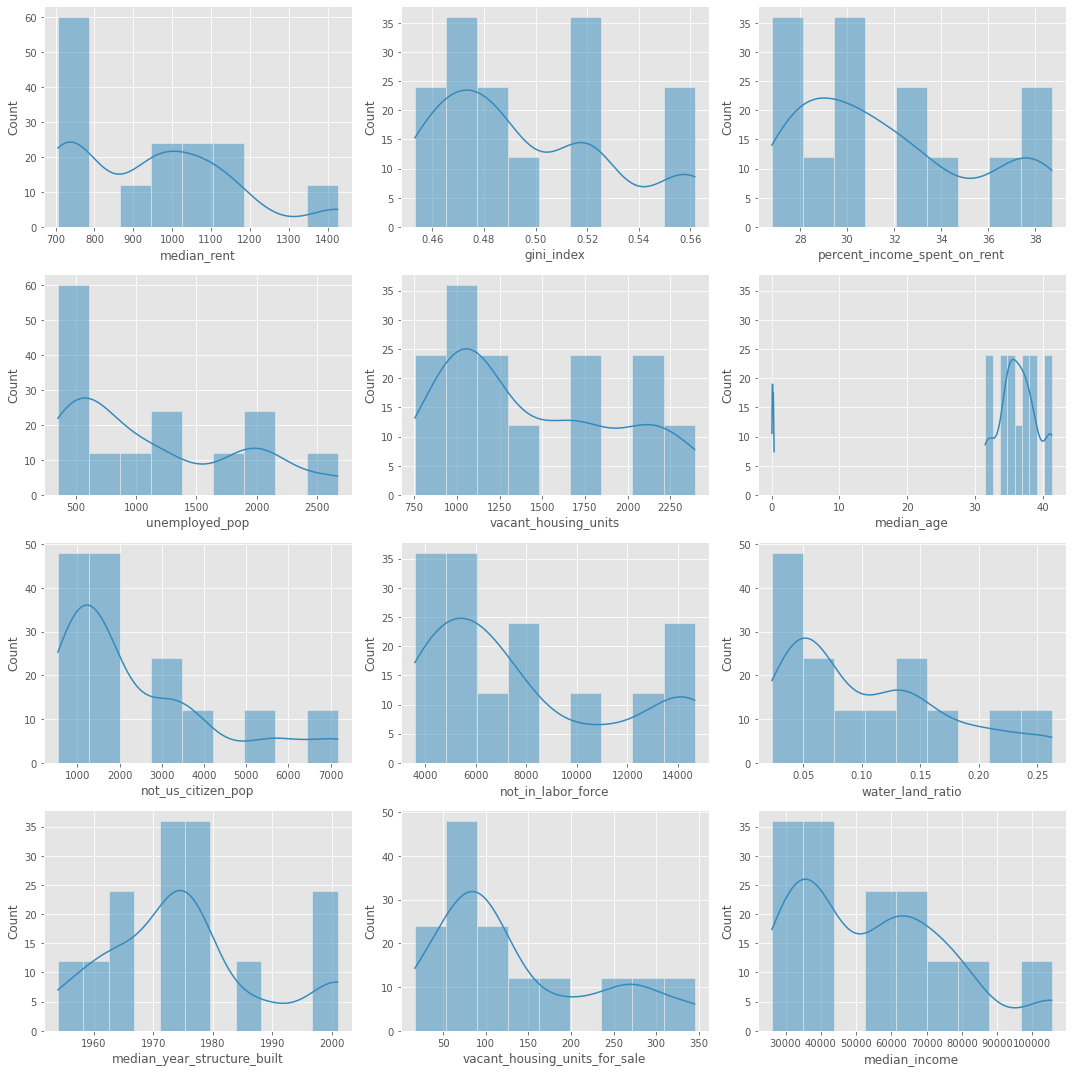

In [83]:
#see a few features
f, axes = plt.subplots(4, 3, figsize=(15,15))

sns.histplot( x= "median_rent", data=features,  ax=axes[0,0], kde = True)
sns.histplot( x= "gini_index", data=features,  ax=axes[0,1], kde = True)
sns.histplot( x= "percent_income_spent_on_rent", data=features, ax=axes[0,2], kde = True)
sns.histplot( x= "unemployed_pop", data=features,  ax=axes[1,0], kde = True)
sns.histplot( x= "vacant_housing_units", data=features,  ax=axes[1,1], kde = True)
sns.histplot( x= "median_age", data=features,  ax=axes[1,2], kde = True)
sns.histplot( x= "poverty_rate", data=features,  ax=axes[1,2], kde = True)
sns.histplot( x= "not_us_citizen_pop", data=features,  ax=axes[2,0], kde = True)
sns.histplot( x= "not_in_labor_force", data=features,  ax=axes[2,1], kde = True)
sns.histplot( x= "water_land_ratio", data=features,  ax=axes[2,2], kde = True)
sns.histplot( x= "median_year_structure_built", data=features,  ax=axes[3,0], kde = True)
sns.histplot( x= "vacant_housing_units_for_sale", data=features,  ax=axes[3,1], kde = True)
sns.histplot( x= "median_income", data=features,  ax=axes[3,2], kde = True)

plt.tight_layout();

In [330]:
# from sklearn.preprocessing import PowerTransformer
   
# pt = PowerTransformer(method = 'yeo-johnson')
# for feature in list(features.select_dtypes(include = ['int64', 'float64'])):
#     features[feature] = pt.fit_transform(features[feature].to_numpy().reshape(-1,1))
#     features[feature] = pt.transform(features[feature].to_numpy().reshape(-1,1))    

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2960: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2995: Runtime

In [84]:
features.head()

,zri,year,month,median_rent,vacant_housing_units,one_parent_families_with_young_children,one_year_more_college,female_female_households,families_with_young_children,sales_office_employed,rent_20_to_25_percent,male_45_64_grade_9_12,male_45_64_some_college,male_80_to_84,dwellings_50_or_more_units,less_one_year_college,income_less_10000,owner_occupied_housing_units,owner_occupied_housing_units_median_value,black_male_55_64,occupation_natural_resources_construction_maintenance,male_25_to_29,female_10_to_14,two_or_more_races_pop,income_200000_or_more,occupation_production_transportation_material,male_85_and_over,less_than_high_school_graduate,vacant_housing_units_for_rent,dwellings_3_to_4_units,other_race_pop,female_40_to_44,income_20000_24999,male_10_to_14,income_45000_49999,male_20,income_50000_59999,pop_in_labor_force,in_grades_1_to_4,married_households,income_150000_199999,median_year_structure_built,one_car,million_dollar_housing_units,male_under_5,population_3_years_over,housing_built_1939_or_earlier,commute_60_more_mins,female_60_to_61,father_in_labor_force_one_parent_families_with_young_children,high_school_diploma,two_parents_mother_in_labor_force_families_with_young_children,employed_other_services_not_public_admin,male_65_to_66,pop_16_over,male_67_to_69,employed_arts_entertainment_recreation_accommodation_food,employed_education_health_social,male_30_to_34,commute_less_10_mins,population_1_year_and_over,male_35_to_39,female_15_to_17,income_60000_74999,female_18_to_19,employed_information,female_30_to_34,housing_built_2005_or_later,geo_id,occupation_services,four_more_cars,commute_25_29_mins,two_parents_father_in_labor_force_families_with_young_children,male_50_to_54,female_80_to_84,amerindian_pop,female_85_and_over,workers_16_and_over,commute_10_14_mins,rent_35_to_40_percent,high_school_including_ged,in_school,median_age,rent_25_to_30_percent,some_college_and_associates_degree,pop_25_64,income_10000_14999,nonfamily_households,commuters_by_subway_or_elevated,male_45_64_bachelors_degree,owner_occupied_housing_units_lower_value_quartile,mobile_homes,different_house_year_ago_different_city,white_pop,not_hispanic_pop,income_40000_44999,dwellings_10_to_19_units,dwellings_2_units,in_grades_9_to_12,children,civilian_labor_force,hispanic_male_55_64,owner_occupied_housing_units_upper_value_quartile,mortgaged_housing_units,asian_male_55_64,not_us_citizen_pop,associates_degree,renter_occupied_housing_units_paying_cash_median_gross_rent,female_62_to_64,male_15_to_17,male_40_to_44,female_67_to_69,employed_agriculture_forestry_fishing_hunting_mining,female_under_5,income_15000_19999,vacant_housing_units_for_sale,family_households,households_public_asst_or_food_stamps,children_in_single_female_hh,percent_income_spent_on_rent,rent_burden_not_computed,worked_at_home,black_male_45_54,management_business_sci_arts_employed,asian_male_45_54,male_5_to_9,male_21,female_70_to_74,median_income,commuters_drove_alone,male_55_to_59,rent_under_10_percent,commuters_16_over,rent_10_to_15_percent,commuters_by_car_truck_van,female_35_to_39,female_25_to_29,bachelors_degree,in_undergrad_college,rent_40_to_50_percent,commuters_by_public_transportation,two_parents_in_labor_force_families_with_young_children,commute_35_44_mins,female_22_to_24,rent_over_50_percent,female_pop,employed_construction,female_75_to_79,masters_degree,different_house_year_ago_same_city,male_male_households,two_parent_families_with_young_children,no_car,commuters_by_bus,male_45_64_associates_degree,asian_pop,in_grades_5_to_8,graduate_professional_degree,female_50_to_54,two_cars,male_45_64_graduate_degree,female_21,father_one_parent_families_with_young_children,male_pop,no_cars,income_35000_39999,walked_to_work,commuters_by_carpool,not_in_labor_force,income_125000_149999,occupied_housing_units,male_45_64_high_school,pop_25_years_over,employed_finance_insurance_real_estate,dwellings_1_units_detached,income_75000_99999,three_cars,employed_public_administration,female_65_to_66,aggregate_tr

### Label

In [85]:
label = df_model[(df_model['year'].isin(['2019']))][['zri']]
label.head()

,zri
1300,1394.0
1301,1194.0
1302,1187.0
1303,1518.0
1304,1201.0


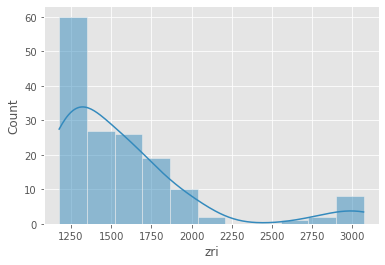

In [86]:
sns.histplot( x= "zri", data=label, kde = True);


In [87]:
label_trans = np.log(label)
label_trans.head()

,zri
1300,7.239933
1301,7.085064
1302,7.079184
1303,7.325149
1304,7.090910


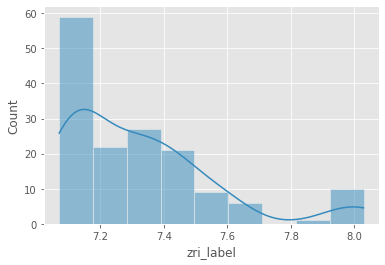

In [88]:
label_trans.rename(columns = {'zri':'zri_label'}, inplace = True)
sns.histplot( x= "zri_label", data=label_trans, kde = True);

In [89]:
label_trans.shape[0]

156

In [90]:
features.shape[0]

156

In [91]:
#transform zri to log scale
features['zri'] = pd.to_numeric(features['zri'], errors='coerce')
features['zri'] = np.log(features['zri'])

In [92]:
features = features.reset_index(drop = True)

In [93]:
label_trans = label_trans.reset_index(drop = True)

In [94]:
lab_and_features = pd.concat([label_trans,features], axis = 1)

In [95]:
lab_and_features.head(5)

,zri_label,zri,year,month,median_rent,vacant_housing_units,one_parent_families_with_young_children,one_year_more_college,female_female_households,families_with_young_children,sales_office_employed,rent_20_to_25_percent,male_45_64_grade_9_12,male_45_64_some_college,male_80_to_84,dwellings_50_or_more_units,less_one_year_college,income_less_10000,owner_occupied_housing_units,owner_occupied_housing_units_median_value,black_male_55_64,occupation_natural_resources_construction_maintenance,male_25_to_29,female_10_to_14,two_or_more_races_pop,income_200000_or_more,occupation_production_transportation_material,male_85_and_over,less_than_high_school_graduate,vacant_housing_units_for_rent,dwellings_3_to_4_units,other_race_pop,female_40_to_44,income_20000_24999,male_10_to_14,income_45000_49999,male_20,income_50000_59999,pop_in_labor_force,in_grades_1_to_4,married_households,income_150000_199999,median_year_structure_built,one_car,million_dollar_housing_units,male_under_5,population_3_years_over,housing_built_1939_or_earlier,commute_60_more_mins,female_60_to_61,father_in_labor_force_one_parent_families_with_young_children,high_school_diploma,two_parents_mother_in_labor_force_families_with_young_children,employed_other_services_not_public_admin,male_65_to_66,pop_16_over,male_67_to_69,employed_arts_entertainment_recreation_accommodation_food,employed_education_health_social,male_30_to_34,commute_less_10_mins,population_1_year_and_over,male_35_to_39,female_15_to_17,income_60000_74999,female_18_to_19,employed_information,female_30_to_34,housing_built_2005_or_later,geo_id,occupation_services,four_more_cars,commute_25_29_mins,two_parents_father_in_labor_force_families_with_young_children,male_50_to_54,female_80_to_84,amerindian_pop,female_85_and_over,workers_16_and_over,commute_10_14_mins,rent_35_to_40_percent,high_school_including_ged,in_school,median_age,rent_25_to_30_percent,some_college_and_associates_degree,pop_25_64,income_10000_14999,nonfamily_households,commuters_by_subway_or_elevated,male_45_64_bachelors_degree,owner_occupied_housing_units_lower_value_quartile,mobile_homes,different_house_year_ago_different_city,white_pop,not_hispanic_pop,income_40000_44999,dwellings_10_to_19_units,dwellings_2_units,in_grades_9_to_12,children,civilian_labor_force,hispanic_male_55_64,owner_occupied_housing_units_upper_value_quartile,mortgaged_housing_units,asian_male_55_64,not_us_citizen_pop,associates_degree,renter_occupied_housing_units_paying_cash_median_gross_rent,female_62_to_64,male_15_to_17,male_40_to_44,female_67_to_69,employed_agriculture_forestry_fishing_hunting_mining,female_under_5,income_15000_19999,vacant_housing_units_for_sale,family_households,households_public_asst_or_food_stamps,children_in_single_female_hh,percent_income_spent_on_rent,rent_burden_not_computed,worked_at_home,black_male_45_54,management_business_sci_arts_employed,asian_male_45_54,male_5_to_9,male_21,female_70_to_74,median_income,commuters_drove_alone,male_55_to_59,rent_under_10_percent,commuters_16_over,rent_10_to_15_percent,commuters_by_car_truck_van,female_35_to_39,female_25_to_29,bachelors_degree,in_undergrad_college,rent_40_to_50_percent,commuters_by_public_transportation,two_parents_in_labor_force_families_with_young_children,commute_35_44_mins,female_22_to_24,rent_over_50_percent,female_pop,employed_construction,female_75_to_79,masters_degree,different_house_year_ago_same_city,male_male_households,two_parent_families_with_young_children,no_car,commuters_by_bus,male_45_64_associates_degree,asian_pop,in_grades_5_to_8,graduate_professional_degree,female_50_to_54,two_cars,male_45_64_graduate_degree,female_21,father_one_parent_families_with_young_children,male_pop,no_cars,income_35000_39999,walked_to_work,commuters_by_carpool,not_in_labor_force,income_125000_149999,occupied_housing_units,male_45_64_high_school,pop_25_years_over,employed_finance_insurance_real_estate,dwellings_1_units_detached,income_75000_99999,three_cars,employed_public_administration,female_65_to_66,ag

Drop all the rows that don't have a value for the 2018-2020 zri label

In [96]:
missing_labels = lab_and_features[(lab_and_features['zri_label'].isna())].index
lab_and_features = lab_and_features.drop(index = missing_labels)
lab_and_features.shape[0]

155

In [97]:
print_missingness(lab_and_features)

The number of observations is 155
The number of variables is 233
    
The total number of missing values is 0
The number of rows with missing values is 0
The number of features with missing values is 233
---   ---   ---   ---   ---   ---   ---   ---   ---
Series([], dtype: int64)


## Benchmark model
### Predicting zri with historical zri values

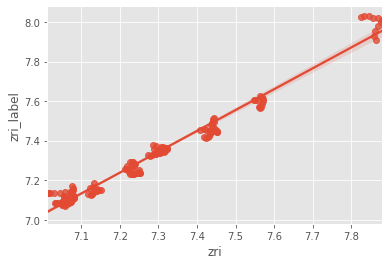

In [98]:

sns.regplot( x= "zri", y = 'zri_label', data=lab_and_features);

#### Train test split

In [99]:
from sklearn.model_selection import train_test_split

Xbase = lab_and_features[['zri']]
y = lab_and_features['zri_label']
#benchmark model

XtrainB, XtestB, ytrainB, ytestB = train_test_split(Xbase,y)

### Imputation

In [100]:
XtrainB = XtrainB.fillna(method = 'ffill')
XtestB = XtestB.fillna(method = 'ffill')

No need to do scaling since the data are on the same scale and similar distributions

### OLS

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

base_ols = LinearRegression()
base_ols.fit(XtrainB,ytrainB)

print(f'Linear regression training score: {base_ols.score(XtrainB,ytrainB)}')
print(f'Linear regression testing score: {base_ols.score(XtestB,ytestB)}')

y_pred = base_ols.predict(XtestB)
RMSE = mean_squared_error(ytestB,y_pred,squared = False)
print(f'Linear regression RMSE: {RMSE}')

Linear regression training score: 0.9760565363043381
Linear regression testing score: 0.9689624878800535
Linear regression RMSE: 0.037959712364601286


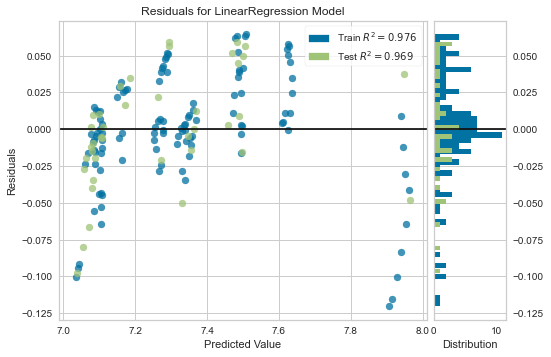

In [102]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(base_ols)
visualizer.fit(XtrainB, ytrainB) 
visualizer.score(XtestB, ytestB)  
visualizer.show() ;

In [104]:
zri_pred= Xbase.copy()


In [107]:
predictions = base_ols.predict(zri_pred) #gives an array
predictions

array([7.26190292, 7.0579604 , 7.0757485 , 7.3151658 , 7.08130489,
       7.2564278 , 7.50073371, 7.62823902, 7.46971023, 7.14929579,
       7.03505993, 7.33064085, 7.26579663, 7.05984682, 7.07667657,
       7.31961013, 7.08222815, 7.2509245 , 7.94765063, 7.50695596,
       7.6243546 , 7.47675343, 7.15534608, 7.03698714, 7.33720508,
       7.27045046, 7.06360972, 7.08222815, 7.32697657, 7.08499317,
       7.25328653, 7.94105576, 7.50633537, 7.62324216, 7.48248175,
       7.15878808, 7.03987146, 7.34589519, 7.27431323, 7.06922936,
       7.08499317, 7.33429261, 7.08958572, 7.25564334, 7.94435828,
       7.50571441, 7.62546587, 7.48375056, 7.15964686, 7.04274803,
       7.34949533, 7.27662422, 7.0757485 , 7.09050187, 7.33938423,
       7.09415863, 7.2626828 , 7.95216113, 7.50010949, 7.63210938,
       7.48565095, 7.16478507, 7.05512451, 7.35951175, 7.28199719,
       7.0785303 , 7.09507087, 7.34589519, 7.10052803, 7.26967622,
       7.96071962, 7.49572972, 7.63541573, 7.48565095, 7.17244

In [108]:
residuals = y - predictions
residuals[:5]

0   -0.021970
1    0.027104
2    0.003436
3    0.009983
4    0.009605
Name: zri_label, dtype: float64

Add residuals to the label and features dataframe

In [109]:
lab_and_features['residuals'] = residuals
lab_and_features.head(3)

,zri_label,zri,year,month,median_rent,vacant_housing_units,one_parent_families_with_young_children,one_year_more_college,female_female_households,families_with_young_children,sales_office_employed,rent_20_to_25_percent,male_45_64_grade_9_12,male_45_64_some_college,male_80_to_84,dwellings_50_or_more_units,less_one_year_college,income_less_10000,owner_occupied_housing_units,owner_occupied_housing_units_median_value,black_male_55_64,occupation_natural_resources_construction_maintenance,male_25_to_29,female_10_to_14,two_or_more_races_pop,income_200000_or_more,occupation_production_transportation_material,male_85_and_over,less_than_high_school_graduate,vacant_housing_units_for_rent,dwellings_3_to_4_units,other_race_pop,female_40_to_44,income_20000_24999,male_10_to_14,income_45000_49999,male_20,income_50000_59999,pop_in_labor_force,in_grades_1_to_4,married_households,income_150000_199999,median_year_structure_built,one_car,million_dollar_housing_units,male_under_5,population_3_years_over,housing_built_1939_or_earlier,commute_60_more_mins,female_60_to_61,father_in_labor_force_one_parent_families_with_young_children,high_school_diploma,two_parents_mother_in_labor_force_families_with_young_children,employed_other_services_not_public_admin,male_65_to_66,pop_16_over,male_67_to_69,employed_arts_entertainment_recreation_accommodation_food,employed_education_health_social,male_30_to_34,commute_less_10_mins,population_1_year_and_over,male_35_to_39,female_15_to_17,income_60000_74999,female_18_to_19,employed_information,female_30_to_34,housing_built_2005_or_later,geo_id,occupation_services,four_more_cars,commute_25_29_mins,two_parents_father_in_labor_force_families_with_young_children,male_50_to_54,female_80_to_84,amerindian_pop,female_85_and_over,workers_16_and_over,commute_10_14_mins,rent_35_to_40_percent,high_school_including_ged,in_school,median_age,rent_25_to_30_percent,some_college_and_associates_degree,pop_25_64,income_10000_14999,nonfamily_households,commuters_by_subway_or_elevated,male_45_64_bachelors_degree,owner_occupied_housing_units_lower_value_quartile,mobile_homes,different_house_year_ago_different_city,white_pop,not_hispanic_pop,income_40000_44999,dwellings_10_to_19_units,dwellings_2_units,in_grades_9_to_12,children,civilian_labor_force,hispanic_male_55_64,owner_occupied_housing_units_upper_value_quartile,mortgaged_housing_units,asian_male_55_64,not_us_citizen_pop,associates_degree,renter_occupied_housing_units_paying_cash_median_gross_rent,female_62_to_64,male_15_to_17,male_40_to_44,female_67_to_69,employed_agriculture_forestry_fishing_hunting_mining,female_under_5,income_15000_19999,vacant_housing_units_for_sale,family_households,households_public_asst_or_food_stamps,children_in_single_female_hh,percent_income_spent_on_rent,rent_burden_not_computed,worked_at_home,black_male_45_54,management_business_sci_arts_employed,asian_male_45_54,male_5_to_9,male_21,female_70_to_74,median_income,commuters_drove_alone,male_55_to_59,rent_under_10_percent,commuters_16_over,rent_10_to_15_percent,commuters_by_car_truck_van,female_35_to_39,female_25_to_29,bachelors_degree,in_undergrad_college,rent_40_to_50_percent,commuters_by_public_transportation,two_parents_in_labor_force_families_with_young_children,commute_35_44_mins,female_22_to_24,rent_over_50_percent,female_pop,employed_construction,female_75_to_79,masters_degree,different_house_year_ago_same_city,male_male_households,two_parent_families_with_young_children,no_car,commuters_by_bus,male_45_64_associates_degree,asian_pop,in_grades_5_to_8,graduate_professional_degree,female_50_to_54,two_cars,male_45_64_graduate_degree,female_21,father_one_parent_families_with_young_children,male_pop,no_cars,income_35000_39999,walked_to_work,commuters_by_carpool,not_in_labor_force,income_125000_149999,occupied_housing_units,male_45_64_high_school,pop_25_years_over,employed_finance_insurance_real_estate,dwellings_1_units_detached,income_75000_99999,three_cars,employed_public_administration,female_65_to_66,ag

#### Residuals EDA

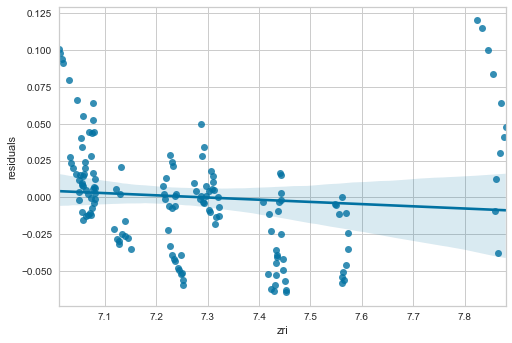

In [110]:
sns.regplot( x= "zri", y = 'residuals', data=lab_and_features);

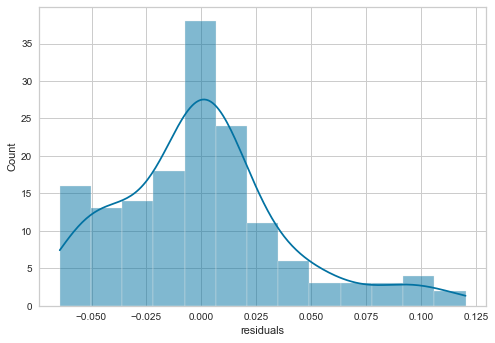

In [111]:
sns.histplot( x= "residuals", data=lab_and_features, kde = True);

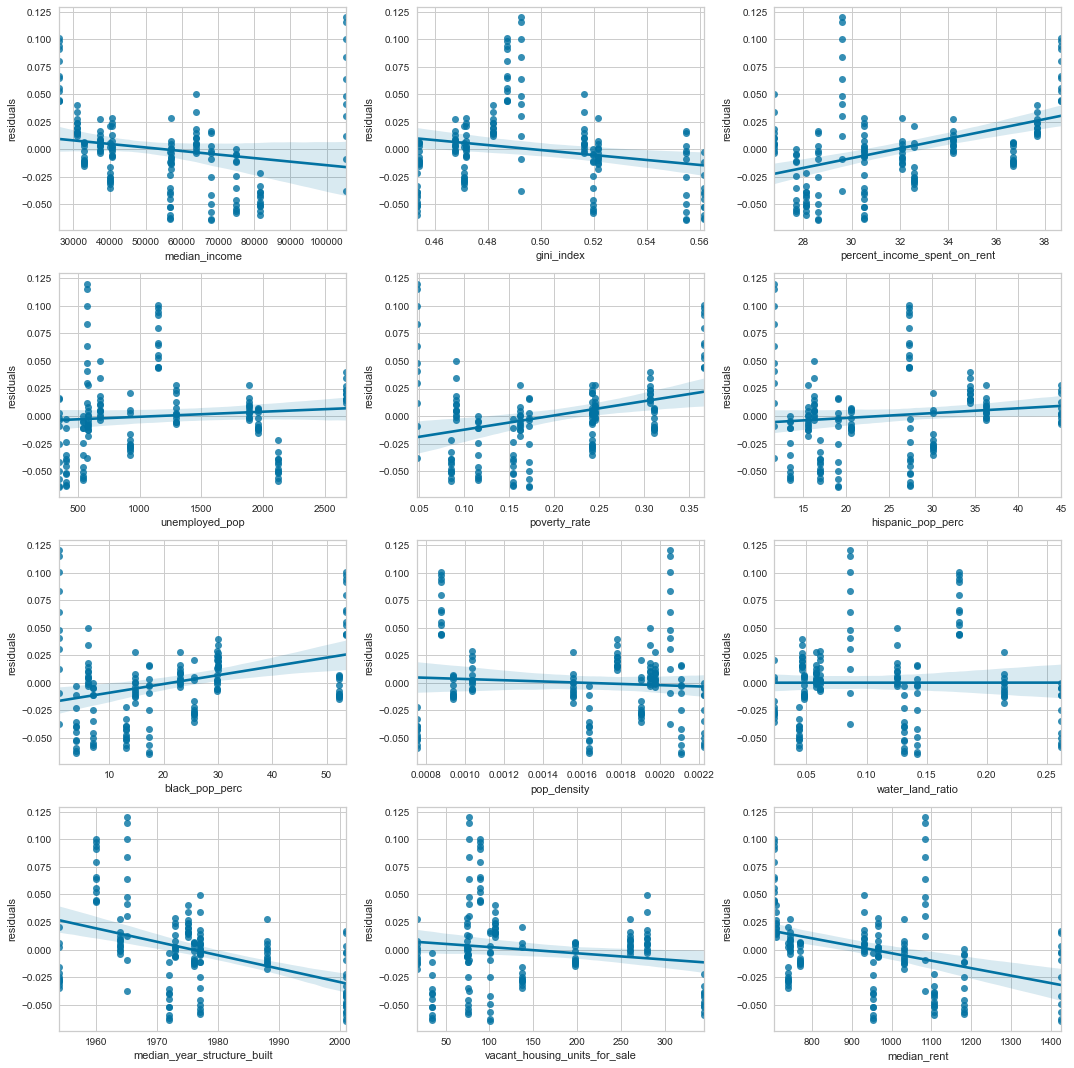

In [112]:
f, axes = plt.subplots(4, 3, figsize=(15,15))

sns.regplot( x= "median_income", y = 'residuals', data=lab_and_features,  ax=axes[0,0])
sns.regplot( x= "gini_index",y = 'residuals', data=lab_and_features,  ax=axes[0,1])
sns.regplot( x= "percent_income_spent_on_rent", y = 'residuals', data=lab_and_features,  ax=axes[0,2])
sns.regplot( x= "unemployed_pop", y = 'residuals', data=lab_and_features,  ax=axes[1,0])
sns.regplot( x= "poverty_rate", y = 'residuals',data=lab_and_features,  ax=axes[1,1])
sns.regplot( x= "hispanic_pop_perc", y = 'residuals',data=lab_and_features,  ax=axes[1,2])
sns.regplot( x= "black_pop_perc", y = 'residuals',data=lab_and_features,  ax=axes[2,0])
sns.regplot( x= "pop_density", y = 'residuals',data=lab_and_features,  ax=axes[2,1])
sns.regplot( x= "water_land_ratio", y = 'residuals',data=lab_and_features,  ax=axes[2,2])
sns.regplot( x= "median_year_structure_built", y = 'residuals',data=lab_and_features,  ax=axes[3,0])
sns.regplot( x= "vacant_housing_units_for_sale", y = 'residuals',data=lab_and_features,  ax=axes[3,1])
sns.regplot( x= "median_rent", y = 'residuals',data=lab_and_features,  ax=axes[3,2])

plt.tight_layout();

### Modeling the residuals

In [113]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import  GridSearchCV, KFold

In [114]:
print_missingness(lab_and_features)

The number of observations is 155
The number of variables is 234
    
The total number of missing values is 0
The number of rows with missing values is 0
The number of features with missing values is 234
---   ---   ---   ---   ---   ---   ---   ---   ---
Series([], dtype: int64)


In [115]:
lab_and_features.dropna(inplace = True)

In [116]:
Xrfr = lab_and_features.drop(columns = ['residuals','zri', 'zri_label', 'year', 'month'])
Yrfr = lab_and_features['residuals'] 
print(Xrfr.shape)
print(len(Yrfr))

(155, 229)
155


In [117]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xrfr,Yrfr)

In [118]:
Xtrain.sample(5)

,median_rent,vacant_housing_units,one_parent_families_with_young_children,one_year_more_college,female_female_households,families_with_young_children,sales_office_employed,rent_20_to_25_percent,male_45_64_grade_9_12,male_45_64_some_college,male_80_to_84,dwellings_50_or_more_units,less_one_year_college,income_less_10000,owner_occupied_housing_units,owner_occupied_housing_units_median_value,black_male_55_64,occupation_natural_resources_construction_maintenance,male_25_to_29,female_10_to_14,two_or_more_races_pop,income_200000_or_more,occupation_production_transportation_material,male_85_and_over,less_than_high_school_graduate,vacant_housing_units_for_rent,dwellings_3_to_4_units,other_race_pop,female_40_to_44,income_20000_24999,male_10_to_14,income_45000_49999,male_20,income_50000_59999,pop_in_labor_force,in_grades_1_to_4,married_households,income_150000_199999,median_year_structure_built,one_car,million_dollar_housing_units,male_under_5,population_3_years_over,housing_built_1939_or_earlier,commute_60_more_mins,female_60_to_61,father_in_labor_force_one_parent_families_with_young_children,high_school_diploma,two_parents_mother_in_labor_force_families_with_young_children,employed_other_services_not_public_admin,male_65_to_66,pop_16_over,male_67_to_69,employed_arts_entertainment_recreation_accommodation_food,employed_education_health_social,male_30_to_34,commute_less_10_mins,population_1_year_and_over,male_35_to_39,female_15_to_17,income_60000_74999,female_18_to_19,employed_information,female_30_to_34,housing_built_2005_or_later,geo_id,occupation_services,four_more_cars,commute_25_29_mins,two_parents_father_in_labor_force_families_with_young_children,male_50_to_54,female_80_to_84,amerindian_pop,female_85_and_over,workers_16_and_over,commute_10_14_mins,rent_35_to_40_percent,high_school_including_ged,in_school,median_age,rent_25_to_30_percent,some_college_and_associates_degree,pop_25_64,income_10000_14999,nonfamily_households,commuters_by_subway_or_elevated,male_45_64_bachelors_degree,owner_occupied_housing_units_lower_value_quartile,mobile_homes,different_house_year_ago_different_city,white_pop,not_hispanic_pop,income_40000_44999,dwellings_10_to_19_units,dwellings_2_units,in_grades_9_to_12,children,civilian_labor_force,hispanic_male_55_64,owner_occupied_housing_units_upper_value_quartile,mortgaged_housing_units,asian_male_55_64,not_us_citizen_pop,associates_degree,renter_occupied_housing_units_paying_cash_median_gross_rent,female_62_to_64,male_15_to_17,male_40_to_44,female_67_to_69,employed_agriculture_forestry_fishing_hunting_mining,female_under_5,income_15000_19999,vacant_housing_units_for_sale,family_households,households_public_asst_or_food_stamps,children_in_single_female_hh,percent_income_spent_on_rent,rent_burden_not_computed,worked_at_home,black_male_45_54,management_business_sci_arts_employed,asian_male_45_54,male_5_to_9,male_21,female_70_to_74,median_income,commuters_drove_alone,male_55_to_59,rent_under_10_percent,commuters_16_over,rent_10_to_15_percent,commuters_by_car_truck_van,female_35_to_39,female_25_to_29,bachelors_degree,in_undergrad_college,rent_40_to_50_percent,commuters_by_public_transportation,two_parents_in_labor_force_families_with_young_children,commute_35_44_mins,female_22_to_24,rent_over_50_percent,female_pop,employed_construction,female_75_to_79,masters_degree,different_house_year_ago_same_city,male_male_households,two_parent_families_with_young_children,no_car,commuters_by_bus,male_45_64_associates_degree,asian_pop,in_grades_5_to_8,graduate_professional_degree,female_50_to_54,two_cars,male_45_64_graduate_degree,female_21,father_one_parent_families_with_young_children,male_pop,no_cars,income_35000_39999,walked_to_work,commuters_by_carpool,not_in_labor_force,income_125000_149999,occupied_housing_units,male_45_64_high_school,pop_25_years_over,employed_finance_insurance_real_estate,dwellings_1_units_detached,income_75000_99999,three_cars,employed_public_administration,female_65_to_66,aggregate_travel_time_to_wo

In [120]:
rfr = RandomForestRegressor()
rfr.fit(Xtrain, ytrain)
print(f'RF regression training score: {rfr.score(Xtrain, ytrain)}')
print(f'RF regression testing score: {rfr.score(Xtest, ytest)}')

RF regression training score: 0.7247664574994942
RF regression testing score: 0.6284353718987923


In [121]:
#parameters grid
params = {'ccp_alpha':[0,0.0001], #lets decrease the size of each tree
         'n_estimators': [100, 200, 300],
         'min_samples_leaf':[5, 10, 20]}
cv = KFold(n_splits = 5, shuffle= True)

grid = GridSearchCV(estimator = rfr,
                   param_grid = params,
                   cv = cv,
                   return_train_score = True)

grid.fit(Xtrain, np.ravel(ytrain))

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'ccp_alpha': [0, 0.0001],
                         'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True)

In [122]:
grid.best_params_

{'ccp_alpha': 0, 'min_samples_leaf': 5, 'n_estimators': 200}

In [124]:
best_rf = grid.best_estimator_
print(f'RF best regression training score: {best_rf.score(Xtrain, ytrain)}')
print(f'RF best regression testing score: {best_rf.score(Xtest, ytest)}')

RF best regression training score: 0.7178281477135235
RF best regression testing score: 0.6241394464011474


In [126]:
feat_imp = pd.Series(rfr.feature_importances_, index = Xtrain.columns)
feat_imp.sort_values(ascending = False)

female_85_and_over                                                3.171298e-01
rent_10_to_15_percent                                             5.795652e-02
in_undergrad_college                                              5.507947e-02
male_25_to_29                                                     4.647421e-02
owner_occupied_housing_units_lower_value_quartile                 3.865809e-02
rent_30_to_35_percent                                             3.525591e-02
commuters_by_public_transportation                                3.412941e-02
owner_occupied_housing_units_median_value                         3.213560e-02
commuters_by_bus                                                  2.964552e-02
different_house_year_ago_different_city                           2.926612e-02
rent_20_to_25_percent                                             2.733094e-02
dwellings_2_units                                                 1.712525e-02
income_75000_99999                                  

In [128]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(Xtrain, np.ravel(ytrain))

GradientBoostingRegressor()

In [130]:
print(gbr.score(Xtrain,ytrain))
print(gbr.score(Xtest,ytest))

y_pred = gbr.predict(Xtest)
RMSE = mean_squared_error(ytest,y_pred,squared = False)
print(f'Gradient Boosting RMSE: {RMSE}')

0.7250190823464571
0.628994524812699
Gradient Boosting RMSE: 0.026225685968995473


In [131]:
paramsGB = {'loss': ['ls', 'huber'],
            'learning_rate':[.01,1,10], #lets decrease the size of each tree
            'n_estimators': [50, 100, 200],
            'max_depth':[3, 4]}

In [132]:
gridGB = GridSearchCV(estimator = gbr,
                       param_grid = paramsGB,
                       cv = cv,
                       return_train_score = True)

gridGB.fit(Xtrain, np.ravel(ytrain))

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-p

/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-p

/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packa

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-p

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:211: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/Applications/anaconda3/lib/python3.8/site-p

/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site

/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.

/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site

/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:385: RuntimeWarning: overflow encountered in multiply
  lin_loss = np.sum(gamma * sample_weight[~gamma_mask] *
/Applications/anaconda3/lib/python3.8/site

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 1, 10],
                         'loss': ['ls', 'huber'], 'max_depth': [3, 4],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True)

In [133]:
gridGB.best_params_

{'learning_rate': 0.01, 'loss': 'ls', 'max_depth': 4, 'n_estimators': 200}

In [135]:
best_gb = gridGB.best_estimator_
print(f'RF best regression training score: {best_gb.score(Xtrain, ytrain)}')
print(f'RF best regression testing score: {best_gb.score(Xtest, ytest)}')

RF best regression training score: 0.7119756031130973
RF best regression testing score: 0.610341338390746


The best gradient boosting model from the grid search is worse than the default one. It is definetly overfit. Keep the params

In [136]:
feat_impGB = pd.Series(gbr.feature_importances_, index = Xtrain.columns)
feat_impGB.sort_values(ascending = False)

female_85_and_over                                                5.619258e-01
high_school_diploma                                               4.874779e-02
commute_30_34_mins                                                3.948572e-02
rent_10_to_15_percent                                             3.262037e-02
high_school_including_ged                                         3.198343e-02
employed_transportation_warehousing_utilities                     2.098433e-02
black_pop_perc                                                    1.853759e-02
income_60000_74999                                                1.702465e-02
poverty_rate                                                      1.673290e-02
owner_occupied_housing_units_lower_value_quartile                 1.460338e-02
commuters_by_bus                                                  1.399384e-02
income_75000_99999                                                1.394229e-02
female_25_to_29                                     